In [1]:
#Import numpy and pandas as their standard aliases. Also import other important variables
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Read the file 'master_dataset.xlsx' into a DataFrame df using the read_xls() function.
df = pd.read_excel('feature_data_class.xlsx', sheetname='Sheet1')

In [3]:
# Select the features and call the new dataframe 'feature_df'
feature_df = df.iloc[:,1:91]

In [4]:
feature_df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Jewelry,...,Books,Musical_Instruments,Star_Wars,Movies_TV,Video_Games,Portable_Audios,Cameras_Camcoders,Auto_Electronics,Wearable_Tech,Smart_homes
0,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,20094.19,...,73315.81,57022.45,118966.90,58034.24,56157.83,113009.41,27930.71,32954.82,10344.16,0.01
1,38.51,2.548,10382.9,6115.67,215.07,2406.62,6551.42,211.242170,8.106,57258.43,...,77280.42,57845.36,126907.41,63245.00,66172.11,111466.37,5265.09,30149.20,14740.14,0.01
2,39.93,2.514,10382.9,6115.67,215.07,2406.62,6551.42,211.289143,8.106,16333.14,...,78602.71,59462.22,122267.65,69962.56,62795.87,124821.44,5265.09,33726.13,10139.42,0.01
3,46.63,2.561,10382.9,6115.67,215.07,2406.62,6551.42,211.319643,8.106,41595.55,...,76091.36,63011.44,135066.75,62581.64,72212.32,107952.07,28420.73,31585.78,12087.95,20.00
4,46.50,2.625,10382.9,6115.67,215.07,2406.62,6551.42,211.350143,8.106,19403.54,...,71718.48,57335.17,125048.08,57630.02,55501.07,103652.58,28420.73,28457.31,10871.74,20.00


In [5]:
# convert df_sales to numpy array
feature_df.values

array([[  4.23100000e+01,   2.57200000e+00,   1.03829000e+04, ...,
          3.29548200e+04,   1.03441600e+04,   1.00000000e-02],
       [  3.85100000e+01,   2.54800000e+00,   1.03829000e+04, ...,
          3.01492000e+04,   1.47401400e+04,   1.00000000e-02],
       [  3.99300000e+01,   2.51400000e+00,   1.03829000e+04, ...,
          3.37261300e+04,   1.01394200e+04,   1.00000000e-02],
       ..., 
       [  7.93700000e+01,   3.61400000e+00,   3.78994000e+03, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00],
       [  8.28400000e+01,   3.73700000e+00,   2.96149000e+03, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00],
       [  7.60600000e+01,   3.80400000e+00,   2.12020000e+02, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00]])

In [6]:
# calculate the shape of the numpy array (feature_df.values.shape)
feature_df.values.shape

(8190, 90)

In [7]:
# convert df['Type'] - the target to numpy array
df['Type'].values

array(['A', 'A', 'A', ..., 'B', 'B', 'B'], dtype=object)

In [8]:
# calculate the shape of the numpy array (df['Type'].values)
df['Type'].values.shape

(8190,)

In [9]:
# Confirm that both df_sales.values and df_targetIsHol.values are numpy arrays
type(feature_df.values), type (df['Type'].values)

(numpy.ndarray, numpy.ndarray)

In [10]:
# Extracting features names
feature_names = list(feature_df.columns.values)

In [11]:
feature_names

['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Jewelry',
 'Pets',
 'TV_Video',
 'Cell_Phones',
 'Pharmaceutical ',
 'Health_beauty',
 'Toy ',
 'Home_others',
 'Kitchen',
 'Bedding',
 'Bathroom',
 'Office_supplies ',
 'School_Supplies',
 'Home_Office',
 'Craft_general',
 'Floral',
 'Beading',
 'Paint',
 'Framing',
 'outdoor',
 'Auto',
 'School_Uniforms',
 'Baby_Toddlers_Clothing',
 'Baby_Kids_Shoes',
 'Clearance_Clothings',
 'Boys_Clothing',
 'Girls_Clothing',
 'Women_Clothing',
 'Intimates_Sleepwears',
 'Men_Clothings',
 'Precious_Metals',
 'Active_Wear',
 'Adult_Shoes',
 'Bags_Accessories',
 'Sportswear',
 'Computer',
 'Music',
 'Luggage',
 'Food',
 'Fruit',
 'Grocery',
 'Laundry',
 'IPad_Tablets',
 'Heating_Cooling',
 'Swim_Shop',
 'Gift_cards',
 'Baby_Essentials',
 'Cribs',
 'Car_Seats',
 'Strollers',
 'Bikes',
 'Photo',
 'Household_Essentials',
 'Air_Quality',
 'Light_bulbs',
 'Gardening',
 'Building_M

In [12]:
# Extracting features names
target_names = ['A', 'B', 'C']

In [13]:
# Assign X and y to the features and target data respectively
X = feature_df.values
y = df['Type'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [19]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

In [20]:
#fit the classifier to the X_train and y_train
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [21]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
predictions = mlp.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[971  14  17]
 [ 17 741   6]
 [ 25   0 257]]


In [24]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          A       0.96      0.97      0.96      1002
          B       0.98      0.97      0.98       764
          C       0.92      0.91      0.91       282

avg / total       0.96      0.96      0.96      2048



In [25]:
len(mlp.coefs_)

4

In [26]:

len(mlp.coefs_[0])

90

In [27]:
len(mlp.intercepts_[0])

30

### Visualization of MLP weights on RETAIL DATASET
Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a MLPClassifier trained on the Retail dataset.

The input data consists of data set of dimension 8190 x 90 (90 features in the dataset). Therefore the first layer weight matrix have the shape (90, hidden_layer_sizes[0]). We can therefore visualize a single column of the weight matrix as a 9 x 10 spatial appearance.

In [56]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

In [57]:
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(9,10), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)

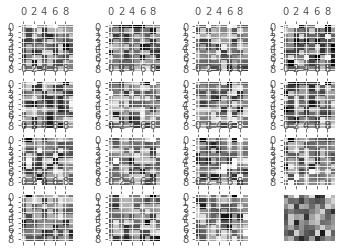

In [58]:
ax.set_xticks(())
ax.set_yticks(())
plt.show()

###### Create a new column called df.target where the value is 0 if target is A, 1 if target is B and 2 if target is C
target_df[target_df['Type'] == 'A']  = 0
target_df[target_df['Type'] == 'B']  = 1
target_df[target_df['Type'] == 'C']  = 2
